In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

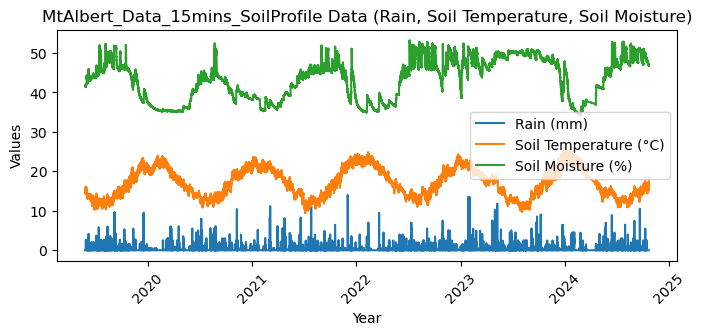

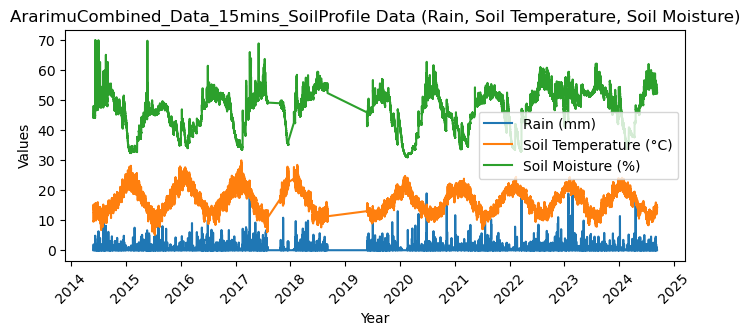

In [2]:
import matplotlib.dates as mdates
import os

station_files = [
    '../Data/soil data/AcrossAucklandRainfallStation/MtAlbert_Data_15mins_SoilProfile.csv',
    '../Data/soil data/AcrossAucklandRainfallStation/ArarimuCombined_Data_15mins_SoilProfile.csv',
    '../Data/soil data/AcrossAucklandRainfallStation/awhituCombined_Data_15mins_SoilProfile.csv',
    '../Data/soil data/AcrossAucklandRainfallStation/Kaipara_Data_15mins_SoilProfile.csv',
    '../Data/soil data/AcrossAucklandRainfallStation/tomarataCombined_Data_15mins_SoilProfile.csv',
    '../Data/soil data/AcrossAucklandRainfallStation/waitangiCombined_Data_15mins_SoilProfile.csv',
    '../Data/soil data/AcrossAucklandRainfallStation/whangamarieCombined_Data_15mins_SoilProfile.csv'

]

for station_file in station_files:
    if os.path.exists(station_file):
        # Load data, parse datetime column
        station_data = pd.read_csv(station_file, parse_dates=['Timestamp (UTC+12:00)'])
        
        # Set 'Timestamp (UTC+12:00)' as the index for easier plotting of dates
        station_data.set_index('Timestamp (UTC+12:00)', inplace=True)
        
        # Plot each parameter
        plt.figure(figsize=(8, 3))
        plt.plot(station_data.index, station_data['Rain(mm)'], label='Rain (mm)')
        plt.plot(station_data.index, station_data['SoilTemp(c)'], label='Soil Temperature (°C)')
        plt.plot(station_data.index, station_data['SoilMoisture(%)'], label='Soil Moisture (%)')

        # Set x-ticks to show each year and rotate labels by 45 degrees
        plt.gca().xaxis.set_major_locator(mdates.YearLocator())
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        plt.xticks(rotation=45)
        
        # Add labels, legend, and title
        plt.xlabel("Year")
        plt.ylabel("Values")
        station_name = os.path.basename(station_file).replace('.csv', '')  # Extract station name
        plt.title(f"{station_name} Data (Rain, Soil Temperature, Soil Moisture)")
        plt.legend()
        plt.show()
    else:
        print(f"File not found: {station_file}")

Normalize data by station to make them comparable:



In [ ]:
from sklearn.preprocessing import StandardScaler

# Apply scaling (fit on each station separately if needed)
scaler = StandardScaler()
for station_file in station_files:
    station_data[['Rain(mm)', 'SoilTemp(c)', 'SoilMoisture(%)']] = scaler.fit_transform(
        station_data[['Rain(mm)', 'SoilTemp(c)', 'SoilMoisture(%)']]
    )

In [ ]:
station_data.columns

Index(['Rain(mm)', 'SoilTemp(c)', 'SoilMoisture(%)', 'Location', 'Soil order',
       'NZ Soil Classification', 'Mean annual rainfall (mm) ',
       'Pastoral land use', 'Brackish Estuarine', 'Coastal Forest',
       'Dune Vegetation', 'Freshwater Wetland', 'Kauri Forest',
       'Volcanic Boulderfield', 'Podocarp/Broadleaf & Kauri', 'Shrubland',
       'Unclassified', 'Ecological District'],
      dtype='object')

In [ ]:
columns_to_encode = ['Location','Soil order', 'NZ Soil Classification', 'Pastoral land use', 'Ecological District']
encoded_station_data = []

for station_file in station_files:    
    # Use the pd.get_dummies() function to perform one-hot encoding
    station_data_encoded  = pd.get_dummies(station_data, columns=columns_to_encode)
    encoded_station_data.append(station_data_encoded)
    
combined_data = pd.concat(encoded_station_data, ignore_index=True)
start_date = '2019-05-28'
end_date = '2024-09-09'
combined_data = combined_data[(combined_data['Timestamp (UTC+12:00)'] >= start_date) & 
                              (combined_data['Timestamp (UTC+12:00)'] <= end_date)]


KeyError: 'Timestamp (UTC+12:00)'

In [ ]:
combined_data

,Timestamp (UTC+12:00),Rain(mm),SoilTemp(c),SoilMoisture(%),Mean annual rainfall (mm),Brackish Estuarine,Coastal Forest,Dune Vegetation,Freshwater Wetland,Kauri Forest,Volcanic Boulderfield,Podocarp/Broadleaf & Kauri,Shrubland,Unclassified,Location_Tomarata at Briens Farm,Soil order_Ultic,NZ Soil Classification_Perch Gley or Densipan Ultic,Pastoral land use_Dairy,Ecological District_Rodney
176,2019-05-28 00:00:00,0.0,16.800,32.671,1348,1010,505,163,858,762,0,13089,10643,2501,True,True,True,True,True
177,2019-05-28 00:15:00,0.0,16.700,32.945,1349,1010,505,163,858,762,0,13089,10643,2501,True,True,True,True,True
178,2019-05-28 00:30:00,0.0,16.800,32.945,1350,1010,505,163,858,762,0,13089,10643,2501,True,True,True,True,True
179,2019-05-28 00:45:00,0.0,16.600,33.036,1351,1010,505,163,858,762,0,13089,10643,2501,True,True,True,True,True
180,2019-05-28 01:00:00,0.0,16.600,33.032,1352,1010,505,163,858,762,0,13089,10643,2501,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297318,2024-09-08 23:00:00,0.0,13.813,38.491,186342,1010,505,163,858,762,0,13089,10643,2501,True,True,True,True,True
1297319,2024-09-08 23:15:00,0.0,13.588,38.491,186343,1010,505,163,858,762,0,13089,10643,2501,True,True,True,True,True
1297320,2024-09-08 23:30:00,0.0,13.588,38.491,186344,1010,505,163,858,762,0,13089,10643,2501,True,True,True,True,True
1297321,2024-09-08 23:45:00,0.0,13.512,38.491,186345,1010,505,163,858,762,0,13089,10643,2501,True,True,True,True,True


<Axes: >

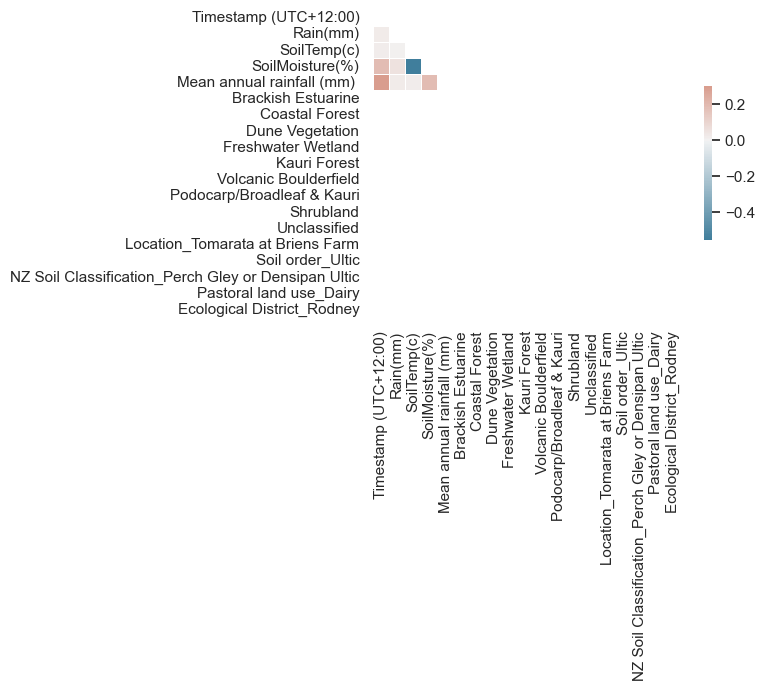

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")


# Compute the correlation matrix
corr = combined_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
print("Columns in combined_data:", combined_data.columns.tolist())


Columns in combined_data: ['Timestamp (UTC+12:00)', 'Rain(mm)', 'SoilTemp(c)', 'SoilMoisture(%)', 'Mean annual rainfall (mm) ', 'Brackish Estuarine', 'Coastal Forest', 'Dune Vegetation', 'Freshwater Wetland', 'Kauri Forest', 'Volcanic Boulderfield', 'Podocarp/Broadleaf & Kauri', 'Shrubland', 'Unclassified', 'Location_Tomarata at Briens Farm', 'Soil order_Ultic', 'NZ Soil Classification_Perch Gley or Densipan Ultic', 'Pastoral land use_Dairy', 'Ecological District_Rodney']


In [ ]:
from sklearn.model_selection import train_test_split


X = combined_data.drop(columns=['Timestamp (UTC+12:00)', 'SoilMoisture(%)'])
y = combined_data[['SoilMoisture(%)']]


X, y = X.align(y, join='inner', axis=0)  # Ensures X and y align after dropping NaNs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1294993, 17)
y shape: (1294993, 1)


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(X.dtypes)


Rain(mm)                                               float64
SoilTemp(c)                                            float64
Mean annual rainfall (mm)                                int64
Brackish Estuarine                                       int64
Coastal Forest                                           int64
Dune Vegetation                                          int64
Freshwater Wetland                                       int64
Kauri Forest                                             int64
Volcanic Boulderfield                                    int64
Podocarp/Broadleaf & Kauri                               int64
Shrubland                                                int64
Unclassified                                             int64
Location_Tomarata at Briens Farm                          bool
Soil order_Ultic                                          bool
NZ Soil Classification_Perch Gley or Densipan Ultic       bool
Pastoral land use_Dairy                                

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


c:\Users\Ying\.conda\envs\level8\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RMSE: 0.004007147258875673


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

def evaluate_model(predictions, y_test):
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = sqrt(mse)
    r2 = r2_score(y_test, predictions)

    return mae, mse, rmse, r2

rf_mae, rf_mse, rf_rmse, rf_r2 = evaluate_model(rf_predictions, y_test)

print("\nRandom Forest Testing Set Metrics:")
print(f"MAE: {rf_mae}")
print(f"MSE: {rf_mse}")
print(f"RMSE: {rf_rmse}")
print(f"R2 Score: {rf_r2}")


Random Forest Testing Set Metrics:
MAE: 0.0009939144995422505
MSE: 1.6057229154314816e-05
RMSE: 0.004007147258875673
R2 Score: 0.9999998373134527


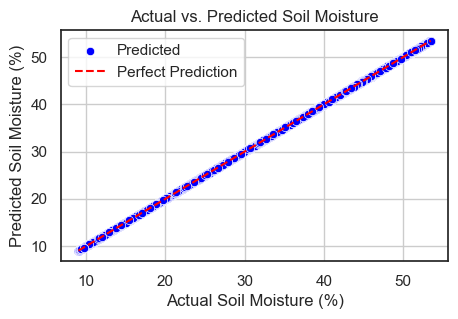

In [ ]:
y_test_df = y_test.reset_index(drop=True)
predictions_df = pd.DataFrame(rf_predictions, columns=['Predicted'])

results_df = pd.concat([y_test_df, predictions_df], axis=1)

plt.figure(figsize=(5, 3))
sns.scatterplot(x=results_df['SoilMoisture(%)'], y=results_df['Predicted'], color='blue', label='Predicted')
plt.plot([results_df['SoilMoisture(%)'].min(), results_df['SoilMoisture(%)'].max()], 
         [results_df['SoilMoisture(%)'].min(), results_df['SoilMoisture(%)'].max()], 
         color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted Soil Moisture')
plt.xlabel('Actual Soil Moisture (%)')
plt.ylabel('Predicted Soil Moisture (%)')
plt.legend()
plt.grid()
plt.show()

C:\Users\Ying\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


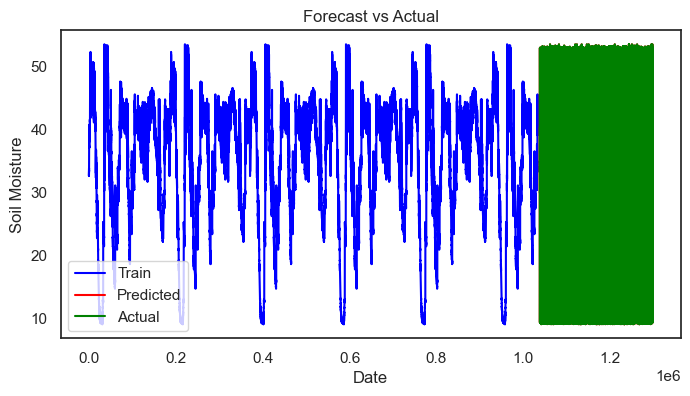

In [ ]:
y_test_df = y_test.reset_index(drop=True)
predictions_df = pd.DataFrame(rf_predictions, columns=['Predicted'])

results_df = pd.concat([y_test_df, predictions_df], axis=1)
results_df.index = combined_data.index[-len(y_test):] 

plt.figure(figsize=(8, 4))
plt.plot(combined_data['SoilMoisture(%)'][:len(X_train)], label='Train', color='blue')
plt.plot(results_df.index, results_df['Predicted'], color='red', label='Predicted')
plt.plot(results_df.index, results_df['SoilMoisture(%)'], color='green', label='Actual')
plt.title('Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Soil Moisture')
plt.legend()
plt.show()